In [1]:
from linear_depth_circuit import *
from matrix_simulation import *
from naive_circuit import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Number of position qubits
n = 3
# Number of steps
n_step = 23
# Number of times we want to run the circuits
n_shot = 10000
# Angles for the coin operators
angles = random_angles(n)

# Linear-depth position-dependent coin operators quantum circuit
linear_qc = quantum_walk_linear_depth_circuit(n,angles,n_step,qft=True)
counts1 = simulate_circuit(linear_qc,n_shot)

# Naive position-dependent coin operators quantum circuit
naive_qc = quantum_walk_naive_circuit(n,angles,n_step,qft=True)
counts2 = simulate_circuit(naive_qc1,n_shot)

# Matrix simulation
v = position_state(n)
c = coin_state()
q = quantum_state(v,c)

q_final = quantum_walk_simulation(n,q,angles,n_step)

counts3 = results(n,q_final)
# Convert the matrix simulation results in qiskit dictionary
counts3 = Counts(counts3)

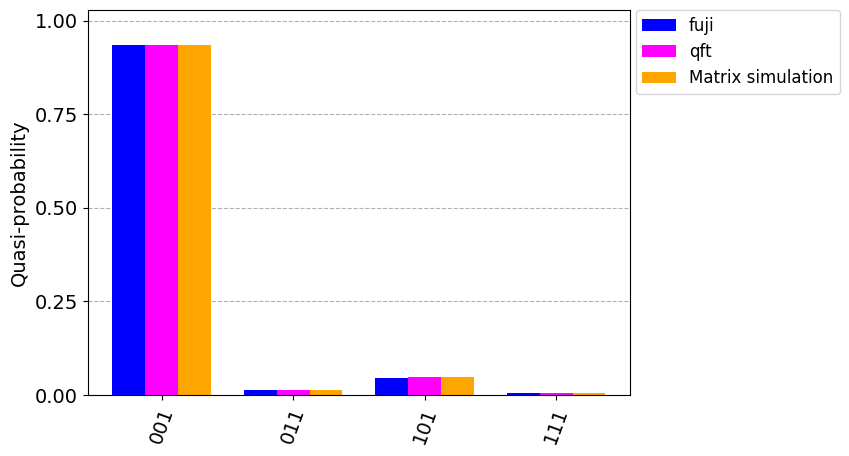

In [4]:
plot_histogram([counts1,counts2, counts3], legend=['Naive','Linear-depth', 'Matrix simulation'],
               color=['blue','magenta','orange'],bar_labels=False)

In [ ]:
angles

In [27]:
n = 6
basis = ['rz', 'h', 'cx']
simulator = QasmSimulator()
angles = random_angles(n)
linear = build_linear_depth_circuit(n,angles)
linear_compiled = transpile(linear, simulator, basis_gates=basis)

sum(dict(linear_compiled.count_ops()).values())

6196

In [24]:
qft = qft_shift(3)
qft_compiled = transpile(qft, simulator, basis_gates=basis)
sum(dict(qft.count_ops()).values())

13

### Plots

In [ ]:
n_max = 8
n_abs = [i for i in range(1,n_max+1)]

# Depth
depth_naive = []
depth_linear = []
depth_naive_compiled = []
depth_linear_compiled = []

# Quantum gates
gate_naive = []
gate_linear = []
gate_naive_compiled = []
gate_linear_compiled = []

# Collecting the datas

basis = ['rz', 'h', 'cx']
simulator = QasmSimulator()

for i in range(1,n_max+1):
    angle = random_angles(i)
    # Building the circuits
    qc_naive = build_naive_circuit(i,angle)
    qc_linear = build_linear_depth_circuit(i,angle)
    # Getting the compiled circuits
    qc_naive_compiled = transpile(qc_naive, simulator, basis_gates=basis)
    qc_linear_compiled = transpile(qc_linear, simulator, basis_gates=basis)
    # Depth
    depth_naive.append(qc_naive.depth())
    depth_linear.append(qc_linear.depth())
    depth_naive_compiled.append(qc_naive_compiled.depth())
    depth_linear_compiled.append(qc_linear_compiled.depth())
    # Number of gate
    gate_naive.append(sum(dict(qc_naive.count_ops()).values()))
    gate_linear.append(sum(dict(qc_linear.count_ops()).values()))
    gate_naive_compiled.append(sum(dict(qc_naive_compiled.count_ops()).values()))
    gate_linear_compiled.append(sum(dict(qc_linear_compiled.count_ops()).values()))

In [ ]:
def plot(x,y1,y2,label):
    plt.plot(x,y2,label='Linear-depth circuit',marker='o',markeredgecolor='green',markerfacecolor='green')
    plt.plot(x,y1,label='Naive circuit',marker='o',markeredgecolor='red',markerfacecolor='red')
    plt.xlabel('n')
    plt.ylabel(label)
    plt.legend()
    plt.show()

In [ ]:
plot(n_abs, depth_naive, depth_linear, 'Depth before compilation')
plot(n_abs, depth_naive_compiled, depth_linear_compiled, 'Depth after compilation')
plot(n_abs, np.log2(depth_naive_compiled), np.log2(depth_linear_compiled), 'log2(Depth) after compilation')
plot(n_abs, gate_naive, gate_linear, 'Number of gate before compilation')
plot(n_abs, gate_naive_compiled, gate_linear_compiled, 'Number of gate after compilation')
plot(n_abs, np.log2(gate_naive_compiled), np.log2(gate_linear_compiled), 'log2(Number of gate) after compilation')

In [ ]:
from qiskit.tools.monitor import job_monitor

#IBMQ.save_account('7c6a45834df75bd51a09bcf11f6623e946c3858cac62e34e0166f60cd278da6b407e15103d423a942c93663748a4276d94c0189825e73c52758ef2e84e49e528', overwrite=True)
#IBMQ.load_account()

# Number of position qubits
n = 1
# Number of steps
n_step = 4

# Linear-depth position-dependent coin operators quantum circuit
linear_qc = quantum_walk_linear_depth_circuit(n,angles,n_step)

provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_manila')
job = execute(linear_qc ,backend = device,shots = 1024)
job_monitor(job)
device_result = job.result()
real_counts2 = device_result.get_counts(linear_qc)

In [ ]:
# Linear-depth position-dependent coin operators quantum circuit
naive_qc = quantum_walk_naive_circuit(n,angles,n_step)

provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmq_manila')
job = execute(naive_qc ,backend = device,shots = 1024)
job_monitor(job)
device_result = job.result()
real_counts = device_result.get_counts(naive_qc)

In [ ]:
# Matrix simulation
v = position_state(n)
c = coin_state()
q = quantum_state(v,c)

q_final = quantum_walk_simulation(n,q,angles,4)

counts3 = results(n,q_final)
# Convert the matrix simulation results in qiskit dictionary
counts3 = Counts(counts3)

In [ ]:
plot_histogram([real_counts2,real_counts, counts3], legend=['Linear-depth','Naive', 'Matrix simulation'],
               color=['blue','magenta','orange'],bar_labels=False)

In [ ]:
naive_qc = build_naive_circuit(2,random_angles(2))
naive_qc.draw("mpl")

In [ ]:
linear_qc = build_linear_depth_circuit(2,random_angles(2))
linear_qc.draw("mpl")

In [ ]:
simulator = QasmSimulator()
naive_qc_compiled = transpile(naive_qc, simulator, basis_gates=['rz', 'h', 'cx'])
naive_qc_compiled.draw("mpl")

In [ ]:
linear_qc_compiled = transpile(linear_qc, simulator, basis_gates=['rz', 'h', 'cx'])
linear_qc_compiled.draw("mpl")